<a href="https://colab.research.google.com/github/MilkoDeVarona/PredictingStockPricesWithLSTM/blob/main/Predicting_Stock_Prices_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [ ]:
# Install Yahoo Finance library
!pip install yfinance

In [ ]:
# Import libraries
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix

plt.style.use('seaborn')

# Enter selected stock

In [ ]:
# Select stock and load the data
ticker = input("Enter stock ticker: ")
df = yf.download(ticker, "2012-01-01", datetime.now() - timedelta(days=1), auto_adjust=True)

Enter stock ticker: spy
[*********************100%***********************]  1 of 1 completed


# Data Preparation

In [ ]:
# See the first and last 5 rows of the data set
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,103.807448,104.311212,103.539315,103.596191,193697900
2012-01-04,103.352408,103.848045,102.954275,103.758667,127186500
2012-01-05,103.198055,104.189323,102.726793,104.034943,173895000
2012-01-06,104.164963,104.181217,103.425574,103.766830,148050000
2012-01-09,104.002453,104.148701,103.523070,104.018707,99530200
...,...,...,...,...,...
2022-12-13,408.344888,408.613643,397.245861,400.132599,123782500
2022-12-14,399.774230,403.646464,394.498469,397.574341,108111300
2022-12-15,392.497635,393.443305,386.116962,387.848999,117705900


In [ ]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2760 entries, 2012-01-03 to 2022-12-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2760 non-null   float64
 1   High    2760 non-null   float64
 2   Low     2760 non-null   float64
 3   Close   2760 non-null   float64
 4   Volume  2760 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.4 KB


In [ ]:
# Statistical properties of the data set
df.describe()

,Open,High,Low,Close,Volume
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03
mean,241.617675,242.942882,240.161290,241.643784,1.009359e+08
std,98.345346,99.053790,97.533436,98.325807,4.931027e+07
min,103.198055,103.848045,102.726793,103.596191,2.027000e+07
25%,168.480413,169.287803,167.411340,168.664585,6.595100e+07
50%,220.728334,221.240506,219.780291,220.580177,8.930470e+07
75%,297.918025,299.070122,296.010730,297.801727,1.236300e+08
max,471.569592,472.317469,468.460044,470.083679,5.072443e+08


In [ ]:
# Create a dataframe with only the "Close" column
data = df.filter(['Close'])
data

,Close
Date,
2012-01-03,103.596191
2012-01-04,103.758667
2012-01-05,104.034943
2012-01-06,103.766830
2012-01-09,104.018707
...,...
2022-12-13,400.132599
2022-12-14,397.574341
2022-12-15,387.848999


In [ ]:
# Convert the data frame to a numpy array
data_set = data.values
data_set

array([[103.59619141],
       [103.75866699],
       [104.03494263],
       ...,
       [387.84899902],
       [383.26998901],
       [380.01998901]])

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_set = scaler.fit_transform(data_set)
scaled_set

array([[0.00000000e+00],
       [4.43331877e-04],
       [1.19717926e-03],
       ...,
       [7.75613949e-01],
       [7.63119634e-01],
       [7.54251664e-01]])

In [ ]:
# Split the data set
training_set = int(np.ceil(len(data_set) * 0.8))
training_set

2208

In [ ]:
# Create the scaled training data set
train_data = scaled_set[0:training_set, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
# Convert the x_train and y_train data sets to numpy arrays to train the model
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the x_train data set
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2148, 60, 1)

# Descriptive Methods

Closing price chart

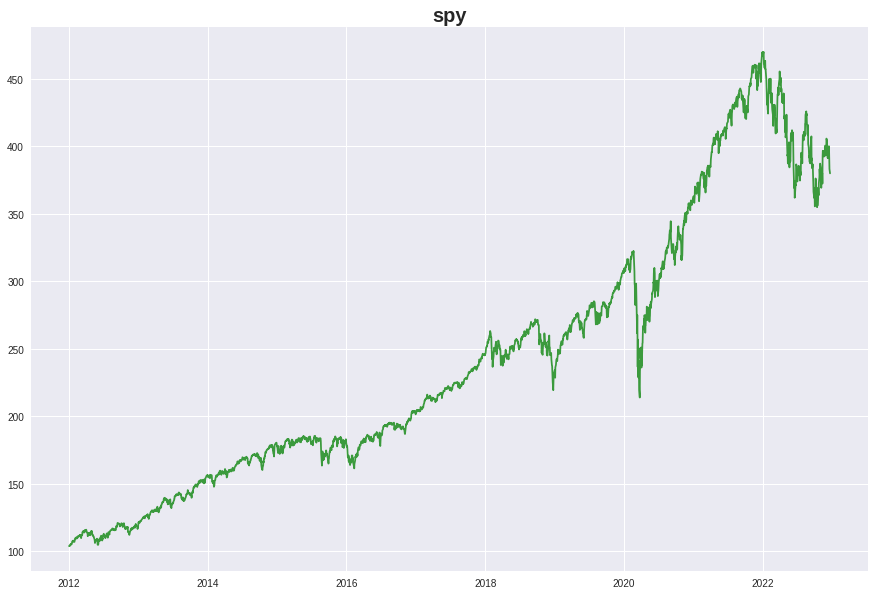

In [ ]:
# Ticker chart
plt.figure(figsize=(15,10))
plt.title(ticker, fontweight='bold', fontsize=20)
plt.plot(df['Close'], color='green', alpha=0.75)
plt.show()

Correlation Matrix and heatmap

            Open      High       Low     Close    Volume
Open    1.000000  0.999877  0.999840  0.999726 -0.350058
High    0.999877  1.000000  0.999734  0.999824 -0.343957
Low     0.999840  0.999734  1.000000  0.999846 -0.358891
Close   0.999726  0.999824  0.999846  1.000000 -0.352697
Volume -0.350058 -0.343957 -0.358891 -0.352697  1.000000



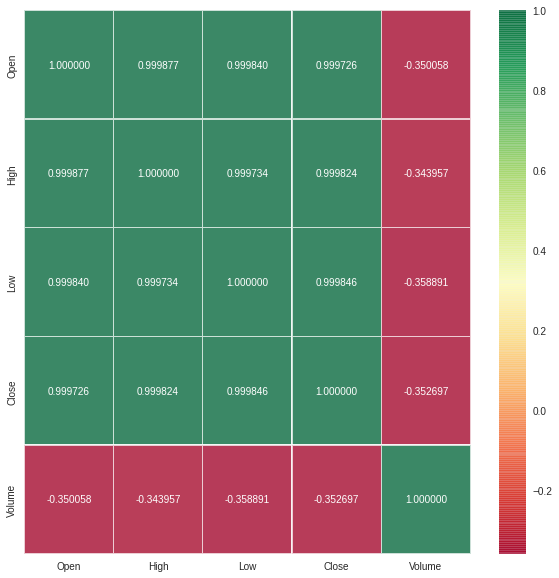

In [ ]:
# Calculate and print correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

print('')

# Create a heatmap using the seaborn library
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True, linewidths = 0.30, fmt=".6f", alpha=0.75);

Daily percentage returns

In [ ]:
# Create a dataframe with the "Close" column and a "daily returns" column
daily_return = data
daily_return['Daily Return'] = (df['Close']/ df['Close'].shift(1)) -1
daily_return

,Close,Daily Return
Date,,
2012-01-03,103.596191,NaN
2012-01-04,103.758667,0.001568
2012-01-05,104.034943,0.002663
2012-01-06,103.766830,-0.002577
2012-01-09,104.018707,0.002427
...,...,...
2022-12-13,400.132599,0.007570
2022-12-14,397.574341,-0.006394
2022-12-15,387.848999,-0.024462


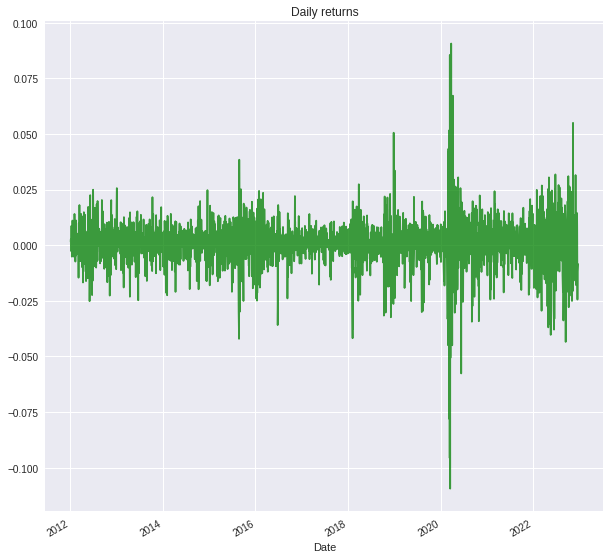

In [ ]:
# Plot daily returns
data['Daily Return'].plot(title='Daily returns', color='green', alpha=0.75, figsize=(10,10))

Histogram of Closing Prices

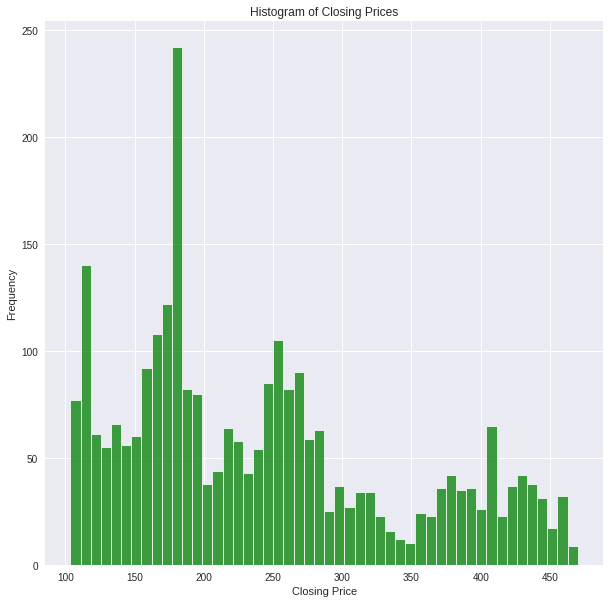

In [ ]:
# Get closing price column from the dataframe
closing_prices = df['Close']

# Create histogram with matplotlib
plt.figure(figsize=(10,10))
plt.hist(closing_prices, bins=50, color='green', alpha=0.75, edgecolor='#ffffff', linewidth=1)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')
plt.show()

Scatterplot of Closing Prices and Volume

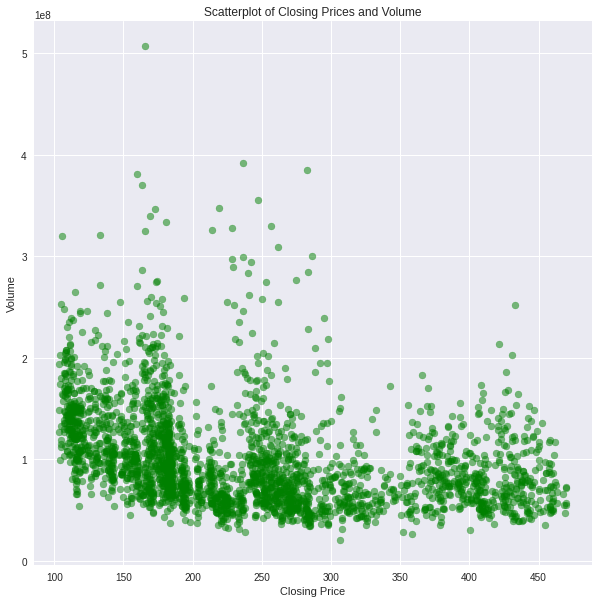

In [ ]:
# Get closing price and volume columns from the dataframe
closing_prices = df['Close']
volumes = df['Volume']

# Create scatterplot with matplotlib
plt.figure(figsize=(10,10))
plt.scatter(closing_prices, volumes, alpha=0.5, color='green')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Scatterplot of Closing Prices and Volume')
plt.show()

# LSTM Neural Network

In [ ]:
  # Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
68/68 [==============================] - 8s 59ms/step - loss: 0.0073
Epoch 2/100
68/68 [==============================] - 4s 58ms/step - loss: 2.2673e-04
Epoch 3/100
68/68 [==============================] - 4s 60ms/step - loss: 2.1274e-04
Epoch 4/100
68/68 [==============================] - 4s 59ms/step - loss: 2.0028e-04
Epoch 5/100
68/68 [==============================] - 4s 59ms/step - loss: 2.0101e-04
Epoch 6/100
68/68 [==============================] - 4s 59ms/step - loss: 1.8347e-04
Epoch 7/100
68/68 [==============================] - 4s 59ms/step - loss: 2.2928e-04
Epoch 8/100
68/68 [==============================] - 4s 59ms/step - loss: 1.8117e-04
Epoch 9/100
68/68 [==============================] - 4s 58ms/step - loss: 1.8267e-04
Epoch 10/100
68/68 [==============================] - 4s 59ms/step - loss: 1.9681e-04
Epoch 11/100
68/68 [==============================] - 4s 58ms/step - loss: 1.6617e-04
Epoch 12/100
68/68 [==============================] - 4s 58ms/step 

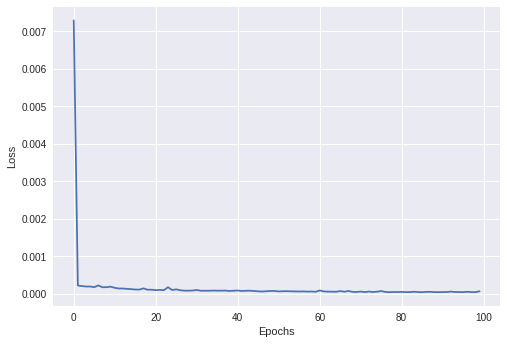

In [ ]:
# Get the loss values for each epoch from the history object
loss_values = history.history['loss']

# Plot the loss values over time
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Create scaled testing data set
test_data = scaled_set[training_set - 60: , :]

# Split the data into x_test and y_test data sets
x_test = []
y_test = data_set[training_set:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values 
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

18/18 [==============================] - 2s 17ms/step


In [ ]:
# Plot the data
train = data[:training_set]
validation = data[training_set:]
validation['prediction'] = prediction

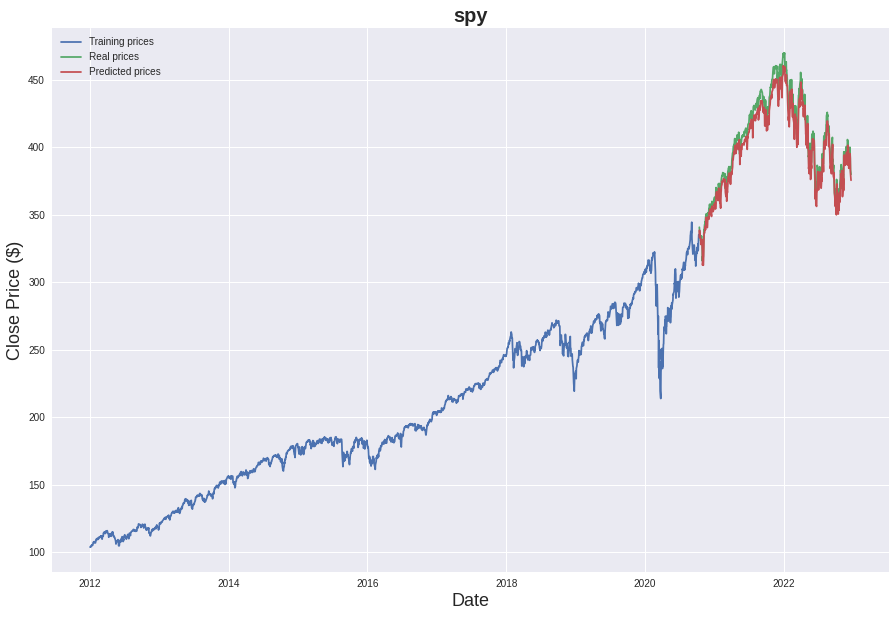

In [ ]:
# Visualize the data
plt.figure(figsize=(15,10))
plt.title(ticker, fontweight='bold', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'prediction']])
plt.legend(['Training prices', 'Real prices', 'Predicted prices'], loc='upper left')
plt.show()

In [ ]:
# Show the real and predicted prices
validation

,Close,Daily Return,prediction
Date,,,
2020-10-12,340.788971,0.016087,333.302002
2020-10-13,338.564972,-0.006526,338.571747
2020-10-14,336.437622,-0.006283,336.769104
2020-10-15,336.021851,-0.001236,333.711700
2020-10-16,335.818787,-0.000604,332.839874
...,...,...,...
2022-12-13,400.132599,0.007570,391.618805
2022-12-14,397.574341,-0.006394,395.257385
2022-12-15,387.848999,-0.024462,392.109070


In [ ]:
# Create new data frame with close price column
new_df = df.filter(['Close'])

# Get last 60 days of closing prices and convert dataframe to an array
last_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_days_scaled = scaler.transform(last_days)

# Append the past 60 days to an empty list
X_test = []
X_test.append(last_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get predicted scaled price
predicted_price = model.predict(X_test)

# Undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)

# Print the predicted price for the last day on the data set
print(predicted_price)

1/1 [==============================] - 0s 24ms/step
[[373.15964]]


In [ ]:
# Get the quote
df2 = yf.download(ticker, datetime.now() - timedelta(days=1), datetime.now(), auto_adjust=True)

# Print the real price for the last day on the data set
print(df2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-12-20    380.540009
Name: Close, dtype: float64


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

6.424848528875821

# Log File

In [ ]:
# Create log file and set log level
logging.basicConfig(filename='log_file.log', level=logging.INFO, format='%(asctime)s %(levelname)s: %(message)s')

# Log message by severity level
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')